<a href="https://colab.research.google.com/github/kpacker77/CSE158_Assign2/blob/model_branch/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
data_path="/content/drive/MyDrive/CSE158_Assignment2"

In [50]:
# change directory to the project folder
%cd $data_path
# sanity check this works
import os
print("Now working in:", os.getcwd())
!ls  # list files in the folder

/content/drive/MyDrive/CSE158_Assignment2
Now working in: /content/drive/MyDrive/CSE158_Assignment2
modcloth_final_data.json.gz  renttherunway_final_data.json.gz


In [51]:
import gzip
import json

In [52]:
RTR_path = "/content/drive/MyDrive/CSE158_Assignment2/renttherunway_final_data.json.gz"

In [53]:
data = []
with gzip.open(RTR_path, "rt", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

print('There are',len(data), 'entries of type', type(data[0]))

There are 192544 entries of type <class 'dict'>


In [54]:
df = pd.DataFrame(data)
df.head(10)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"
5,fit,734848,32b,364092,138lbs,8,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45,"April 30, 2016"
6,fit,336066,34c,568429,112lbs,10,everyday,This dress is so sweet. I loved the print. The...,hourglass,LITERALLY THE CUTEST DRESS EVER,dress,"5' 3""",4,27,"December 7, 2017"
7,fit,86661,34d+,130259,118lbs,10,formal affair,Fit was great. Maybe a little tight under the ...,full bust,"Great dress, beautifully made. I received lot...",dress,"5' 3""",8,65,"January 1, 2013"
8,fit,166228,36d,1729232,NaN,10,formal affair,I was nervous of it looking cheap when it arri...,full bust,Great for black tie event!,gown,"5' 6""",21,27,"June 27, 2016"
9,fit,154309,32b,1729232,114lbs,10,formal affair,The dress was very flattering and fit perfectl...,petite,This dress was everything! It was perfect for ...,gown,"5' 3""",1,33,"October 17, 2016"


In [55]:
df.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

In [56]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fit             192544 non-null  object
 1   user_id         192544 non-null  object
 2   bust size       174133 non-null  object
 3   item_id         192544 non-null  object
 4   weight          162562 non-null  object
 5   rating          192462 non-null  object
 6   rented for      192534 non-null  object
 7   review_text     192544 non-null  object
 8   body type       177907 non-null  object
 9   review_summary  192544 non-null  object
 10  category        192544 non-null  object
 11  height          191867 non-null  object
 12  size            192544 non-null  int64 
 13  age             191584 non-null  object
 14  review_date     192544 non-null  object
dtypes: int64(1), object(14)
memory usage: 22.0+ MB


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
count,192544,192544,174133,192544,162562,192462,192534,192544,177907,192544,192544,191867,192544.000000,191584,192544
unique,3,105571,106,5850,190,5,9,191031,7,154740,68,24,NaN,89,2274
top,fit,691468,34b,126335,130lbs,10,wedding,.,hourglass,Stylist Review,dress,"5' 4""",NaN,31,"June 15, 2016"
freq,142058,436,27285,2241,14370,124537,57784,63,55349,977,92884,28012,NaN,14522,844
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.245175,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.494877,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN


In [57]:
#Look at each category's count of null values
df.isna().sum().sort_values(ascending=False)

,0
weight,29982
bust size,18411
body type,14637
age,960
height,677
rating,82
rented for,10
item_id,0
user_id,0
fit,0


In [58]:
def h_to_in(h):
    if pd.isna(h):
        return np.nan
    # height is currently "5' 8\"" → split on the apostrophe
    feet, inches = h.split("'")
    feet = int(feet.strip())
    inches = int(inches.replace('"', '').strip())
    return feet * 12 + inches #make conversion to inches

In [59]:
# Let's clean up some of the data
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['height'] = df['height'].apply(h_to_in)

In [60]:
# We should figure a clever way to impute weight
# First we need to remove lbs out of each weight category and make it numeric

# Remove 'lbs' and convert to numeric
df['weight'] = df['weight'].str.replace('lbs', '', regex=False)  # remove the string 'lbs'
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')     # convert to float

In [61]:
"""
Group people by body type, height, and size. For each missing value in each
group, impute with the median.
"""
df['weight'] = df.groupby(['size', 'height', 'body type'])['weight'].transform(
    lambda x: x.fillna(x.median())
)
"""
Some groups had missing body type categories, so now we group by only height and
size. Then fill NaN with the median of those categories.
"""
df['weight'] = df.groupby(['size', 'height'])['weight'].transform(
    lambda x: x.fillna(x.median())
)

"""
There were still some missing values as height wasn't provided. However, all
entries provided size, so group by size and fill NaN with the median of each
size category.
"""
df['weight'] = df.groupby('size')['weight'].transform(
    lambda x: x.fillna(x.median())
    )

In [62]:
df.isna().sum().sort_values(ascending=False)

,0
bust size,18411
body type,14637
age,960
height,677
rating,82
rented for,10
user_id,0
item_id,0
weight,0
fit,0


In [63]:
"""
Bust size is also often left unmarked and could be a strong indicator if a user
would prefer an item from another user of a similar build. We can separate bust
into the cup and the band size. Band size is a measurement of the rib cage and could
align better with weight, height, and overall clothing size.
"""
# Extract numeric band
df['bust_band'] = df['bust size'].str.extract(r'(\d+)').astype(float)

# Extract cup letters (including extended like DDD/E, +, etc.)
df['bust_cup'] = df['bust size'].str.extract(r'([a-zA-Z\+\-/]+)')

In [64]:
df.isna().sum().sort_values(ascending=False)

,0
bust size,18411
bust_cup,18411
bust_band,18411
body type,14637
age,960
height,677
rating,82
rented for,10
fit,0
review_text,0


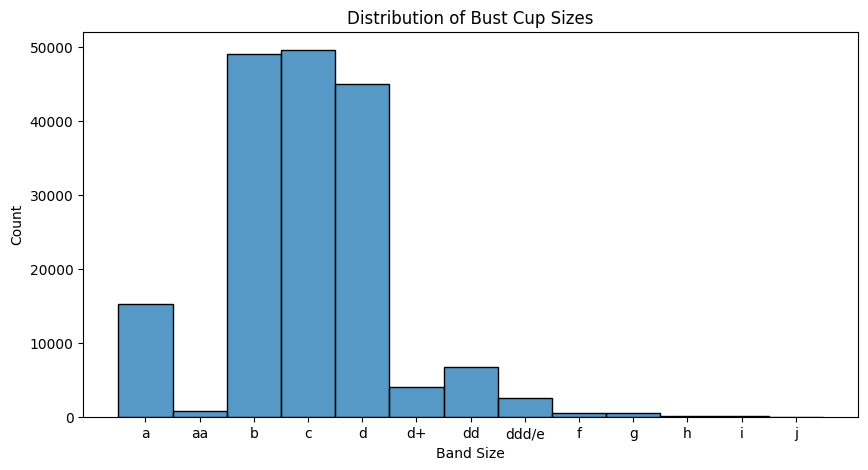

In [65]:
plt.figure(figsize=(10,5))
sns.histplot(df['bust_cup'].sort_values(), bins=10, kde=False)
plt.title("Distribution of Bust Cup Sizes")
plt.xlabel("Band Size")
plt.ylabel("Count")
plt.show()

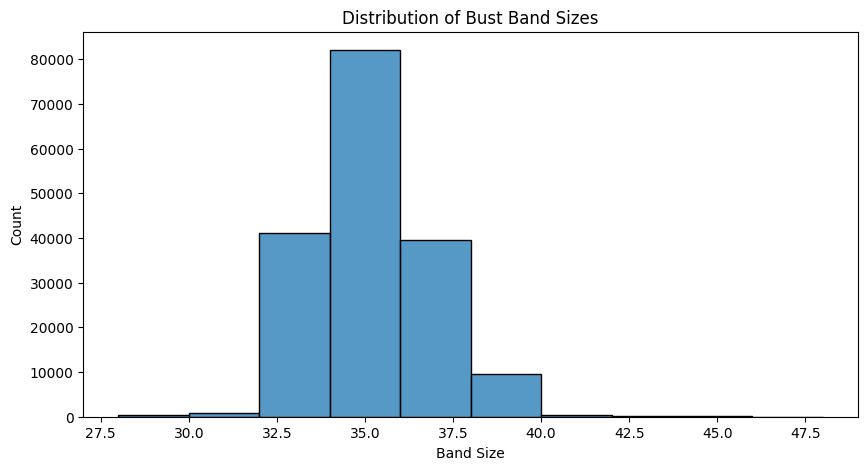

In [66]:
plt.figure(figsize=(10,5))
sns.histplot(df['bust_band'].sort_values(), bins=10, kde=False)
plt.title("Distribution of Bust Band Sizes")
plt.xlabel("Band Size")
plt.ylabel("Count")
plt.show()

In [67]:
df['bust_band'] = df.groupby(['size', 'weight', 'height'])['bust_band'].transform(
    lambda x: x.fillna(x.median())
    )
df['bust_band'] = df.groupby(['size', 'weight'])['bust_band'].transform(
    lambda x: x.fillna(x.median())
    )
df['bust_band'] = df.groupby(['size'])['bust_band'].transform(
    lambda x: x.fillna(x.median())
    )
df['bust_band'] = df['bust_band'].fillna(df['bust_band'].median())

In [68]:
df.isna().sum().sort_values(ascending=False)

,0
bust size,18411
bust_cup,18411
body type,14637
age,960
height,677
rating,82
rented for,10
fit,0
weight,0
review_text,0


In [73]:
# Most restrictive group
df['bust_cup'] = df.groupby(['size', 'weight', 'bust_band'])['bust_cup'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)

# Less restrictive group
df['bust_cup'] = df.groupby(['bust_band', 'weight'])['bust_cup'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)

# Broadest group
df['bust_cup'] = df.groupby(['bust_band'])['bust_cup'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
global_bustcup_mode = df['bust_cup'].mode()[0]
df['bust_cup'] = df['bust_cup'].replace('unkown', global_bustcup_mode)

In [74]:
# Filter band size
# Below 30 and above 42 are deemed outliers
df = df[df['bust_band'].between(30, 42)]

# Filter out cup size i
valid_cups = set(['aa','a','b','c','d','d+','dd','ddd/e','f','g','h'])
df = df[df['bust_cup'].str.lower().isin(valid_cups)]

In [75]:
df = df.drop(columns=['bust size'])

KeyError: "['bust size'] not found in axis"

In [77]:
df['body type'] = df.groupby(['size', 'bust_band','height'])['body type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
df['body type'] = df.groupby(['size', 'bust_band'])['body type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
df['body type'] = df.groupby(['size'])['body type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
global_bodytype_mode = df['body type'].mode()[0]
df['body type'] = df['body type'].replace('unknown', global_bodytype_mode)

In [81]:
df.isna().sum().sort_values(ascending=False)

,0
age,1332
height,676
rating,82
rented for,8
weight,0
item_id,0
fit,0
user_id,0
body type,0
review_text,0


In [79]:
df['age'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   8.,  14.,  15.,  16.,  17.,
        18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,
        29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,
        40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
        51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
        62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  76.,  77.,  78.,  81.,  85.,  87.,  88.,  91.,
        92.,  97.,  99., 100., 106., 109., 112., 113., 115., 116., 117.,
        nan])

In [80]:
df.loc[(df['age'] < 18) | (df['age'] > 80), 'age'] = np.nan

In [82]:
"""
Entries with age missing (960) are less than 1% of the total data. Imputing with median or mode
only adds inaccuracy rather than making the data more robust for training. There does not appear
to be a better way to deal with the missing data, so recommend dropping missing
age values.
"""
df = df[df['age'].notna()]

<Axes: >

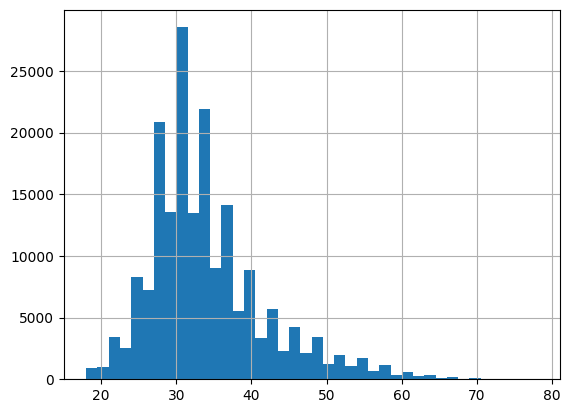

In [83]:
df['age'].hist(bins=40)

In [84]:
"""
Height is also difficult to impute since size, weight, body type, and bust are more
correlated with width rather than vertical height. With less than 1% height entries missing
recommend dropping the rest.
"""
df = df[df['height'].notna()]

<Axes: >

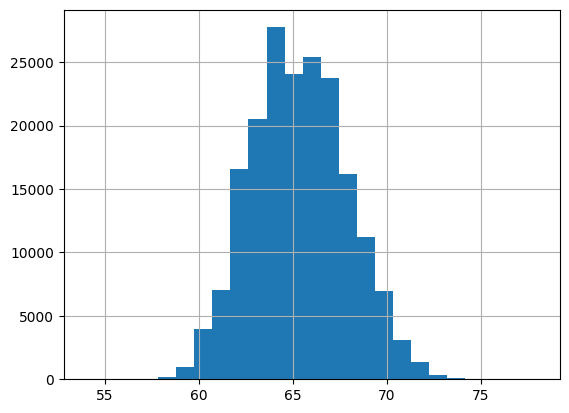

In [85]:
df['height'].hist(bins=25)

In [86]:
"""
We should also drop the remaining missing entries for rating (81) and 'rented for'.
The missing entries are inconsequential to the overall dataset. Same goes
for 'rented for' missing values.
"""
df = df.dropna(subset=['rating', 'rented for'])

In [87]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

Start building recommender system

We begin by creating a pivot table so that we can feed this into our classical
SVD decomposition to pull out the important latent factors.
$A=U\Sigma V^T$. Unfortunately, buidling a pivot table consumes a lot of memory.
We can try to use a memory-efficient pipeline using 'implicit' to build the
sparse user-item and rating matrix and training an Alternating Least Squares
model.

In [ ]:
"""
Running: A = A.fillna(0) creates a full dense copy which breaches threshold of
Google colab system RAM. Need to convert pivot table to a sparse matrix instead.
Spare matrix only stores non-zero entries.
"""
from scipy.sparse import csr_matrix, coo_matrix
from sklearn.model_selection import train_test_split

In [ ]:
#Retreive the unique user IDs and unique item IDs
user_ids = df['user_id'].unique()
item_ids = df['item_id'].unique()

#Map the unique user IDs and item IDs to an eunumerated dictionary
user_map = {uid: i for i, uid in enumerate(user_ids)}
item_map = {iid: i for i, iid in enumerate(item_ids)}

#Add columns to our df with the user_idx and item_idx
df['user_idx'] = df['user_id'].map(user_map)
df['item_idx'] = df['item_id'].map(item_map)

In [ ]:
#Create a train/val (80%) set and a test set (20%)
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=7)

#Of the train/val set, split it into 75% validation and 25% training
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=7)

In [ ]:
# COO format (efficient for construction)
train_sparse = coo_matrix(
    (train_df['rating'].values, (train_df['user_idx'], train_df['item_idx'])),
    shape=(len(user_ids), len(item_ids))
).tocsr()

In [ ]:
val_sparse = coo_matrix(
    (val_df['rating'].values, (val_df['user_idx'], val_df['item_idx'])),
    shape=(len(user_ids), len(item_ids))
).tocsr()

In [ ]:
K_vals =[10,20,50,100,200]

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error

In [ ]:
results = []
for K in K_vals:
    # Train SVD on train_sparse
    svd = TruncatedSVD(n_components=K, random_state=7)
    user_embeddings = svd.fit_transform(train_sparse)  # (num_users, K)
    item_embeddings = svd.components_.T               # (num_items, K)

    # Predict ratings for validation set
    val_preds = np.array([
        user_embeddings[u] @ item_embeddings[i]
        for u, i in zip(val_df['user_idx'], val_df['item_idx'])
    ])

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(val_df['rating'].values, val_preds))
    print(f"K={K}, Validation RMSE={rmse:.4f}")

    results.append((K, rmse))

# Model Branch